<h1>Visual Data Analysis – Gapminder</h1>

<br>

<a href="#Getting-the-data">Getting the data</a>
* <a href="#EDA">EDA</a>
* <a href="#Wrangling-and-merging-everything">Wrangling and merging everything</a>

<a href="#Plotting">Plotting</a>
* <a href="#Fine-tune">Fine tune</a>
* <a href="#Saving-final-plots">Saving final plots</a>

<a href="#--Fin--">Fin</a>

<hr style="margin-top:15px;height:8px;border:0;border-radius:5px;box-shadow:0 10px 15px -10px #111 inset;background-color:rgba(79,170,108,0.7);">

## Getting the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

df_life = pd.read_excel('data/gapminder/gapminder_lifeexpectancy.xlsx', index_col=0)
df_pop = pd.read_excel('data/gapminder/gapminder_population.xlsx', index_col=0)
df_fert = pd.read_csv('data/gapminder/gapminder_total_fertility.csv', index_col=0)
df_cont = pd.read_csv('data/gapminder/continents.csv', sep=';')#, index_col=0)

df_life.columns = df_life.columns.astype(int)
df_pop.columns = df_pop.columns.astype(int)
df_fert.columns = df_fert.columns.astype(int)
df_life.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [2]:
df_pop.head()

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total population,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,741688.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,4525691.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0


In [3]:
df_fert.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total fertility rate,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71


In [4]:
df_cont.head()

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


<hr style="margin-top:15px;height:8px;border:0;border-radius:5px;box-shadow:0 10px 15px -10px #111 inset;background-color:rgba(79,170,108,0.7);">

## EDA

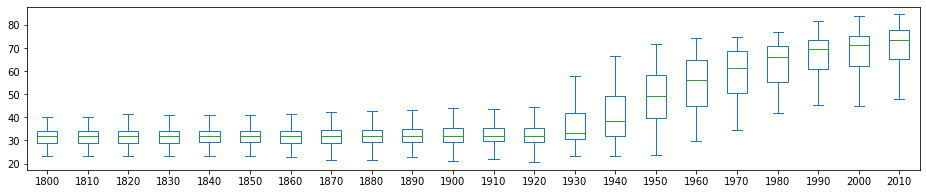

In [5]:
df_life[df_life.columns[::10]].plot(kind='box', figsize=(16,3), showfliers=False)
None

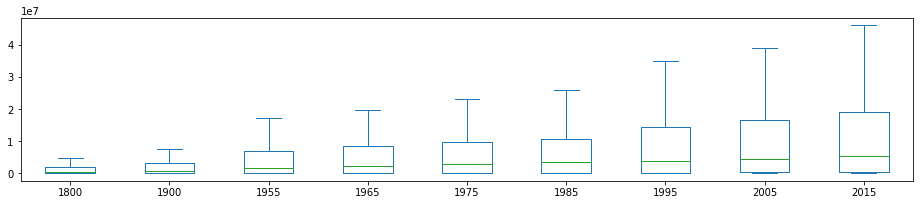

In [6]:
df_pop[df_pop.columns[::10]].plot(kind='box', figsize=(16,3), showfliers=False)
None

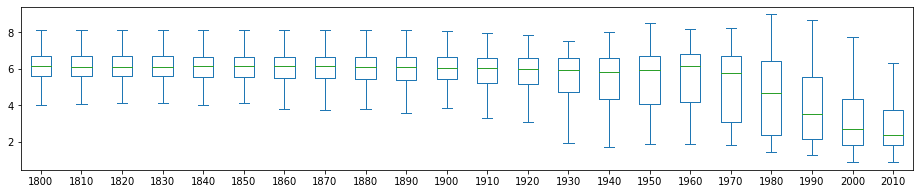

In [7]:
df_fert[df_fert.columns[::10]].plot(kind='box', figsize=(16,3), showfliers=False)
None

In [8]:
df_cont.head()

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


<hr style="margin-top:15px;height:8px;border:0;border-radius:5px;box-shadow:0 10px 15px -10px #111 inset;background-color:rgba(79,170,108,0.7);">

### Wrangling and merging everything

In [9]:
df_fert.index.name = 'country'
df_fert = df_fert.reset_index()
df_fert.head(3)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,6.7,6.46,6.2,5.93,5.66,5.4,5.14,4.9,4.68,4.47
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_life.index.name = 'country'
df_life = df_life.reset_index()
df_life.head(3)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.2,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_fert = df_fert.melt(id_vars='country', var_name='year', value_name='fertility_rate')
df_fert.head(3)

,country,year,fertility_rate
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.0
2,Akrotiri and Dhekelia,1800,NaN


In [12]:
df_life = df_life.melt(id_vars='country', var_name='year', value_name='life_expectancy')
df_life.head(3)

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN


In [13]:
df_pop.index.name = 'country'
df_pop = df_pop.reset_index()
df_pop = df_pop.melt(id_vars='country', var_name='year', value_name='population')
df_pop.head(3)

,country,year,population
0,Abkhazia,1800,NaN
1,Afghanistan,1800,3280000.0
2,Akrotiri and Dhekelia,1800,NaN


In [14]:
df_gap = df_fert.merge(df_pop)
df_gap = df_gap.merge(df_life)
df_gap.head()

,country,year,fertility_rate,population,life_expectancy
0,Abkhazia,1800,NaN,NaN,NaN
1,Afghanistan,1800,7.00,3280000.0,28.21
2,Akrotiri and Dhekelia,1800,NaN,NaN,NaN
3,Albania,1800,4.60,410445.0,35.40
4,Algeria,1800,6.99,2503218.0,28.82


In [15]:
df_gap = df_gap.merge(df_cont)
df_gap.head()

,country,year,fertility_rate,population,life_expectancy,continent
0,Afghanistan,1800,7.0,3280000.0,28.21,Asia
1,Afghanistan,1810,7.0,3280000.0,28.11,Asia
2,Afghanistan,1820,7.0,3323519.0,28.01,Asia
3,Afghanistan,1830,7.0,3448982.0,27.90,Asia
4,Afghanistan,1840,7.0,3625022.0,27.80,Asia


<hr style="margin-top:15px;height:8px;border:0;border-radius:5px;box-shadow:0 10px 15px -10px #111 inset;background-color:rgba(79,170,108,0.7);">

## Plotting

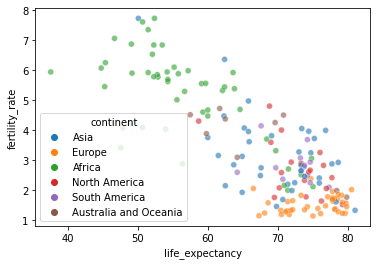

In [16]:
df_subset = df_gap.loc[df_gap['year'] == 2000]
sns.scatterplot(x='life_expectancy', y='fertility_rate', hue="continent", data=df_subset, alpha=0.6)
None

<hr style="margin-top:15px;height:8px;border:0;border-radius:5px;box-shadow:0 10px 15px -10px #111 inset;background-color:rgba(79,170,108,0.7);">

### Fine tune

In [17]:
# cause 5 colors are better to distinguish than 6
df_gap["continent"].replace({"North America": "Americas", "South America": "Americas"}, inplace=True)

In [18]:
color_dict = dict({'Africa':'darksalmon',
                   'Asia':'mediumvioletred',
                   'Europe':'lightseagreen',
                   'Australia and Oceania':'limegreen',
                   'Americas':'darkslateblue',
                   'North America':'darkslateblue',
                   'South America':'slateblue'})

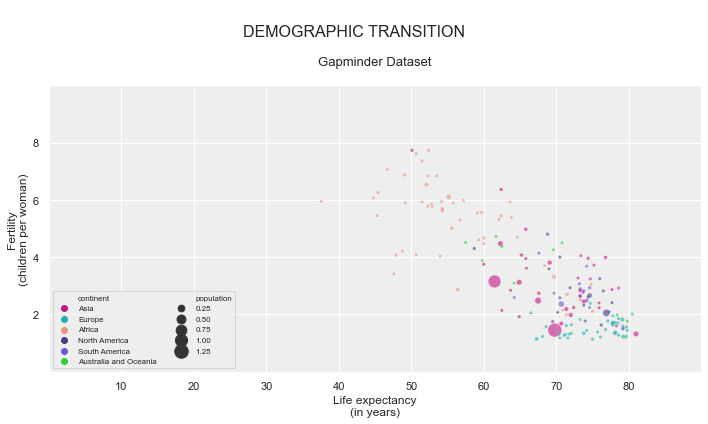

In [19]:
plt.figure(figsize=(10,6))
sns.set(rc={'axes.facecolor':'#eee', 'figure.facecolor':'white'})

sns.scatterplot(x='life_expectancy', y='fertility_rate', size=(df_gap['population']*100), sizes=(10, 200), 
                marker = 'o', hue='continent', palette=color_dict, data=df_subset, alpha=0.6)
plt.suptitle('\nDEMOGRAPHIC TRANSITION', fontsize=16)
plt.title(f'Gapminder Dataset\n', y=1, fontsize = 13)
plt.axis((0, 90, 0, 10))
plt.xlabel("Life expectancy\n(in years)")
plt.xticks(range(10,90)[::10],rotation=0)
plt.ylabel("Fertility\n(children per woman)")
plt.yticks(range(2,10)[::2])#,rotation=0)
plt.legend(loc='lower left', ncol=2, fontsize = 8)
plt.tight_layout()

<hr style="margin-top:15px;height:8px;border:0;border-radius:5px;box-shadow:0 10px 15px -10px #111 inset;background-color:rgba(79,170,108,0.7);">

### Saving final plots

In [20]:
for i in range(1960,2016):
    df_subset = df_gap.loc[df_gap['year'] == i]
    plt.figure(figsize=(10,6))
    sns.set(rc={'axes.facecolor':'#eee', 'figure.facecolor':'white'})
    sns.scatterplot(x='life_expectancy', y='fertility_rate', size=(df_gap['population']*100), sizes=(50, 500), 
                marker = 'o', hue='continent', palette=color_dict, data=df_subset, alpha=0.6)
    plt.suptitle('DEMOGRAPHIC TRANSITION', fontsize=16)
    plt.title(f'Gapminder Dataset\n{i}', y=0.98, fontsize = 13)
    plt.axis((0, 90, 0, 10))
    plt.xlabel("Life expectancy\n(in years)")
    plt.xticks(range(10,90)[::10],rotation=0)
    plt.ylabel("Fertility\n(children per woman)")
    plt.yticks(range(2,10)[::2],rotation=0)
    plt.legend(loc='lower left', ncol=2)
    plt.savefig(f'data/gapminder/coloredplots/lifeexp{i}.png')
    plt.close()

In [21]:
import imageio
images = []

for i in range(1960, 2016):
    filename = f'data/gapminder/coloredplots/lifeexp{i}.png'
    images.append(imageio.imread(filename))

imageio.mimsave('data/gapminder/coloredplots/demogr_trans_slowmo.gif', images, fps=1.86, loop=0) # runs ~30 sec
imageio.mimsave('data/gapminder/coloredplots/demogr_trans.gif', images, fps=5.6, loop=0) # runs 10 sec
imageio.mimsave('data/gapminder/coloredplots/demogr_trans_timelapse.gif', images, fps=(56/2.5), loop=False) #runs 2.5 sec

<hr style="margin-top:15px;height:8px;border:0;border-radius:5px;box-shadow:0 10px 15px -10px #111 inset;background-color:rgba(79,170,108,0.7);">

# - Fin -

<hr style="margin-top:15px;height:8px;border:0;border-radius:5px;box-shadow:0 10px 15px -10px #111 inset;background-color:rgba(79,170,108,0.7);">